<a href="https://colab.research.google.com/github/lageniaestela/12demayo/blob/master/imagenesropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
! pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


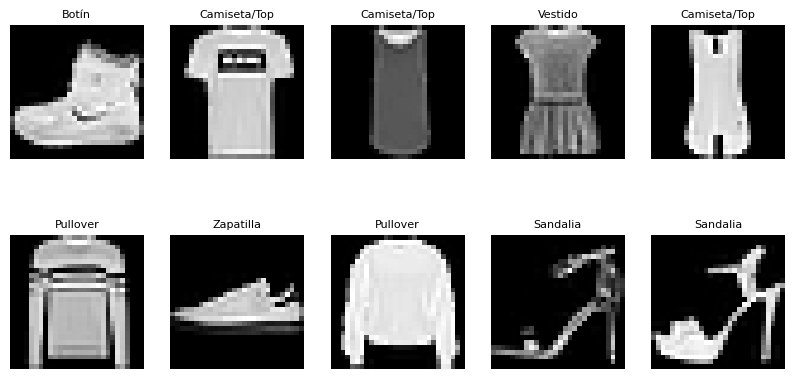

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 - 8s - 5ms/step - accuracy: 0.8226 - loss: 0.5070 - val_accuracy: 0.8497 - val_loss: 0.4328
Epoch 2/5
1688/1688 - 6s - 4ms/step - accuracy: 0.8631 - loss: 0.3810 - val_accuracy: 0.8707 - val_loss: 0.3609
Epoch 3/5
1688/1688 - 7s - 4ms/step - accuracy: 0.8758 - loss: 0.3429 - val_accuracy: 0.8703 - val_loss: 0.3559
Epoch 4/5
1688/1688 - 7s - 4ms/step - accuracy: 0.8845 - loss: 0.3169 - val_accuracy: 0.8830 - val_loss: 0.3305
Epoch 5/5
1688/1688 - 7s - 4ms/step - accuracy: 0.8915 - loss: 0.2968 - val_accuracy: 0.8827 - val_loss: 0.3333

✅ Exactitud en test: 87.23%


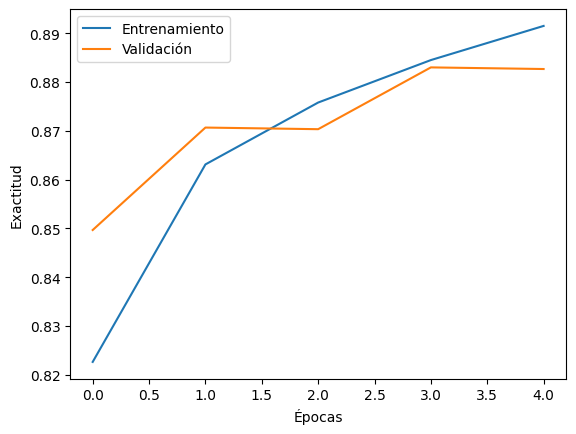

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Etiqueta real: Camisa
Predicción: Camisa


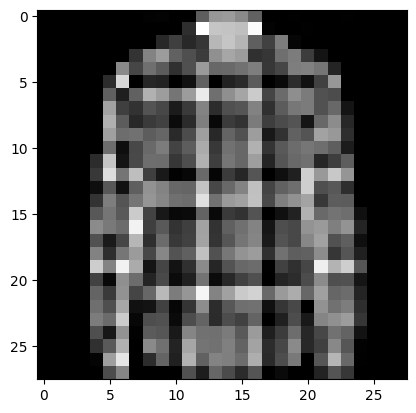

In [3]:
# ===============================
# CLASIFICADOR DE ROPA (Fashion MNIST)
# Google Colab
# ===============================

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# 1. Cargar dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Etiquetas de clases
class_names = ["Camiseta/Top", "Pantalón", "Pullover", "Vestido",
               "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botín"]

# Mostrar algunas imágenes con sus etiquetas
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis("off")
plt.show()

# Normalizar imágenes (0-1 en lugar de 0-255)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Aplana la imagen
    Dense(128, activation='relu'),      # Capa oculta
    Dense(10, activation='softmax')     # 10 categorías de ropa
])

# 3. Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entrenar modelo
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=2)

# 5. Evaluar en test
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Exactitud en test: {accuracy * 100:.2f}%")

# 6. Graficar evolución del entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel("Épocas")
plt.ylabel("Exactitud")
plt.legend()
plt.show()

# 7. Probar con una imagen del test
import numpy as np
i = 7
img = np.expand_dims(x_test[i], axis=0)  # expandir a batch
pred = model.predict(img)

print("Etiqueta real:", class_names[y_test[i]])
print("Predicción:", class_names[np.argmax(pred)])
plt.imshow(x_test[i], cmap="gray")
plt.show()
